In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('./dataset/day.csv')

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
data.duplicated().value_counts()

False    730
dtype: int64

### Season
- Found that **`season`** data is uniformaly is distributed, so droping it is not good idea

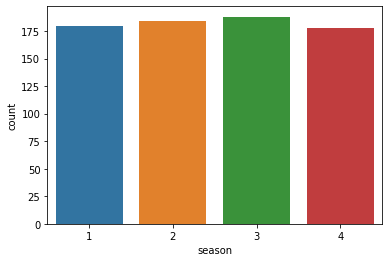

In [8]:
sns.countplot(data=data, x='season')
plt.show()

### dteday and instant
- **`dteday`** have all unique values ans we have derived column **`yr`** and **`mnth`** already in dataset, so we can drop this one
- **`instant`** also same as **`dteday`**, so we can drop this too

In [9]:
print(len(data['dteday'].unique()) == len(data))
print(len(data['instant'].unique()) == len(data))

True
True


In [10]:
data.drop(columns=['dteday'], axis=1, inplace=True)
data.drop(columns=['instant'], axis=1, inplace=True)

- Dropping unnecessary features

In [11]:
data.drop(columns=['registered'], axis=1, inplace=True)
data.drop(columns=['casual'], axis=1, inplace=True)

In [12]:
num_columns = ['temp', 'atemp', 'hum', 'windspeed', 'yr']
categorical_columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
target_column = 'cnt'

## Pair plot for numerical data

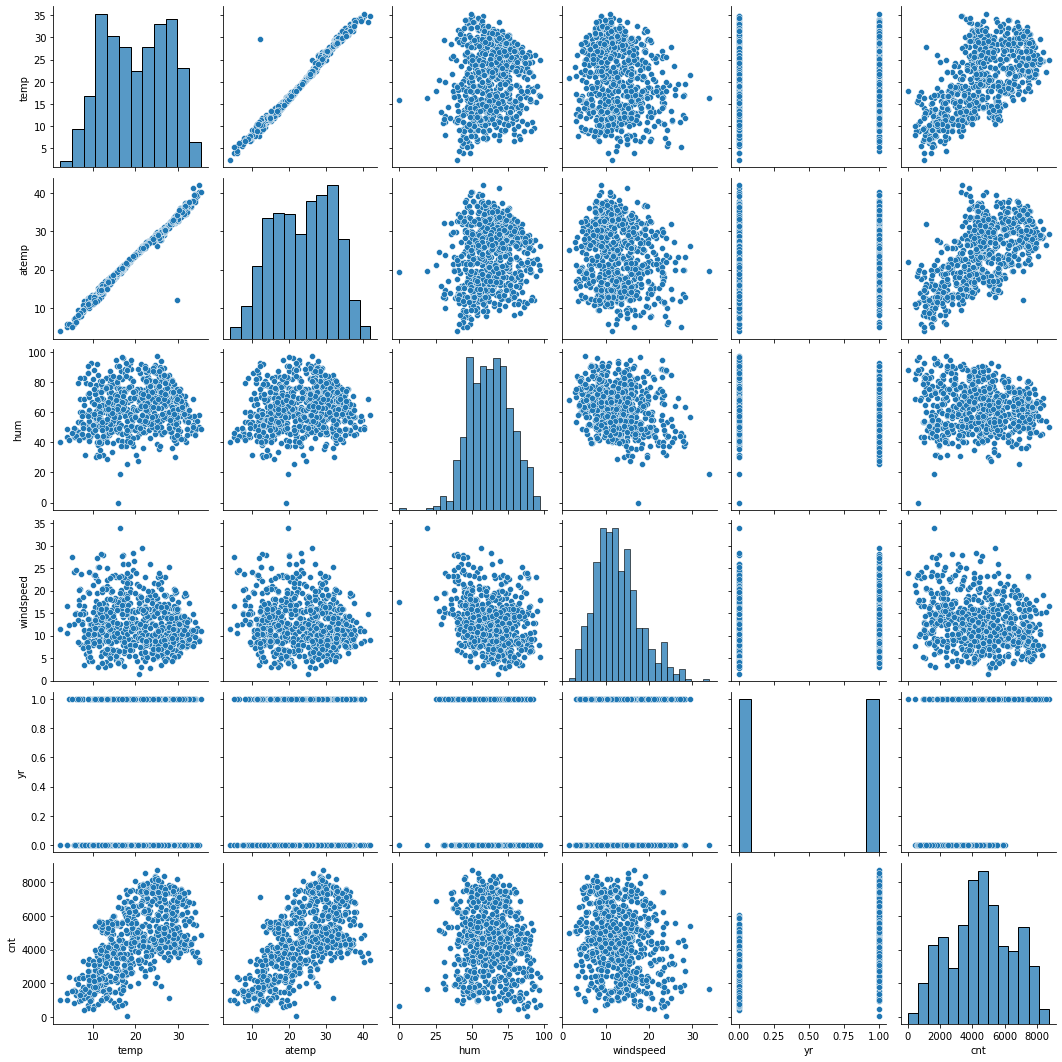

In [13]:
sns.pairplot(data[num_columns+[target_column]])
plt.show()

### Obervations
- **`temp`** and **`atemp`** are highly co-related with each and can be drived from each other, so droping **`temp`** will be good idea becuase its do not add any extra impact on traget
- As we looking into corr plot **`temp`** and **`atemp`** have **`0.99`**, we can drop **`temp`**
- **`registred`** and **`cnt`** have good corr **`0.95`**, which derive good linear model from this data

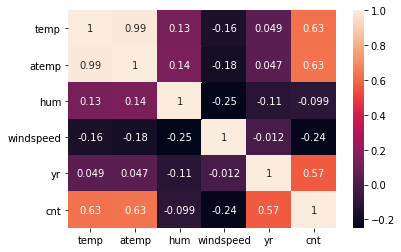

In [14]:
sns.heatmap(data[num_columns+[target_column]].corr(), annot=True)
plt.show()

In [15]:
data.drop(columns=['temp'], axis=1, inplace=True)

## Boxplot on categorical data

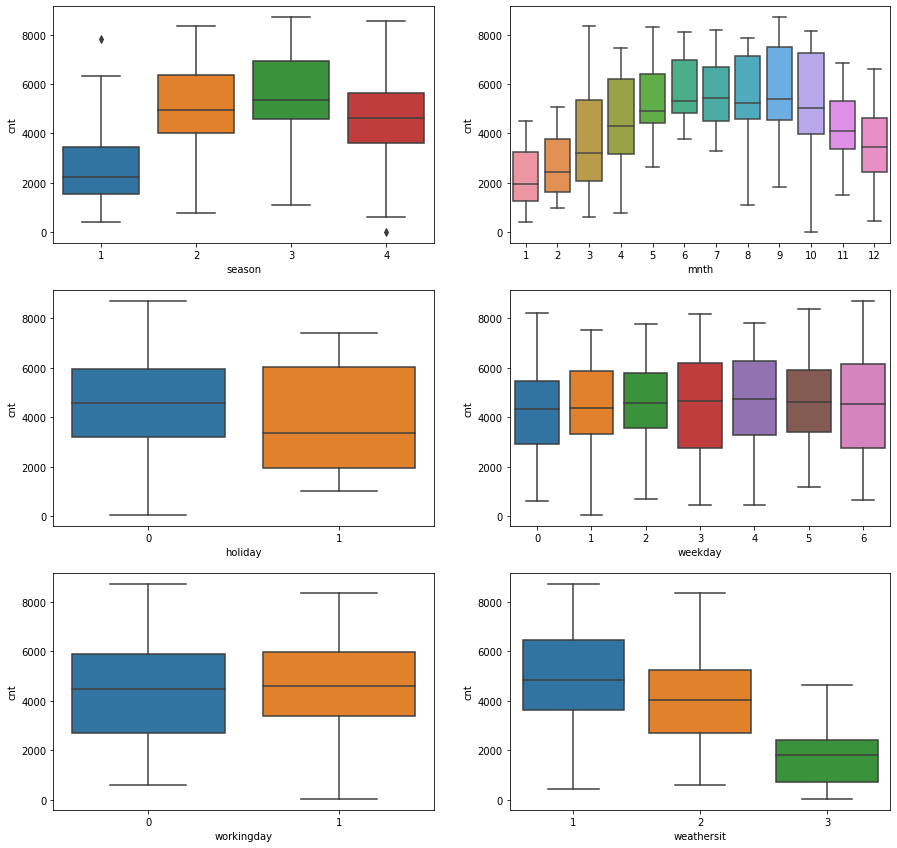

In [16]:
plt.figure(figsize=(15,20))
for x in range(len(categorical_columns)):
    plt.subplot(4, 2, x+1)
    sns.boxplot(data=data, x=categorical_columns[x], y = target_column)
plt.show()

### Observation
- In US, spring season are holydays and in winter christmas holydays and snow that why sharing is lower as compare to other season
- Weekdays and working don't impact more on sharing because the median or each distribution lies on equal level, so may be droped in furure but for not we keep this fature and may be drop is after looing in p-value and VIF

# Creating dummy variables

In [17]:
season_dummy = pd.get_dummies(data['season'], drop_first=True)
season_dummy.columns=['season_2', 'season_3', 'season_4']

In [18]:
weathersit_dummy = pd.get_dummies(data['weathersit'], drop_first=True)
weathersit_dummy.columns=['weathersit_2', 'weathersit_3']

In [19]:
mnth_dummy = pd.get_dummies(data['mnth'], drop_first=True)
mnth_dummy.columns=[F'mnth_{x}' for x in range(2, 13)]

In [20]:
weekday_dummy = pd.get_dummies(data['weekday'], drop_first=True)
weekday_dummy.columns=[F'weekday_{x}' for x in range(1, 7)]

In [21]:
new_data = pd.concat([data, season_dummy, weathersit_dummy, mnth_dummy, weekday_dummy], axis=1)

In [22]:
new_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt', 'season_2',
       'season_3', 'season_4', 'weathersit_2', 'weathersit_3', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [23]:
def get_columns_list(x):
    return x.columns.values.tolist()

In [24]:
new_categorical_colums = ['workingday', 'holiday'] + \
    get_columns_list(season_dummy) + \
    get_columns_list(weathersit_dummy) + \
    get_columns_list(mnth_dummy) + \
    get_columns_list(weekday_dummy)

new_num_columns = ['yr','atemp', 'hum', 'windspeed']

In [25]:
new_data = new_data[new_categorical_colums+new_num_columns+[target_column]]

In [26]:
new_data.head()

,workingday,holiday,season_2,season_3,season_4,weathersit_2,weathersit_3,mnth_2,mnth_3,mnth_4,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,yr,atemp,hum,windspeed,cnt
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,18.18125,80.5833,10.749882,985
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,11.46350,43.6957,12.522300,1600


# Dividing the data
- Test & Train split (20:80 ratio)

In [27]:
train, test = train_test_split(new_data, train_size = 0.8, random_state = 100)
print(F'Train Size - {train.shape}')
print(F'Test Size - {test.shape}')

Train Size - (584, 29)
Test Size - (146, 29)


# Scaling data
- Here using min-max normalisation tech to normalize numerical values in data

In [28]:
minMaxScaler = MinMaxScaler()
train[new_num_columns+[target_column]] = minMaxScaler.fit_transform(
    train[new_num_columns+[target_column]]
)

<ipython-input-28-e05c8e6c2fd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[new_num_columns+[target_column]] = minMaxScaler.fit_transform(
/Users/shubhams/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [29]:
train[new_num_columns+[target_column]].describe()

,yr,atemp,hum,windspeed,cnt
count,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.513175,0.649499,0.319463,0.515792
std,0.500241,0.211663,0.144219,0.168114,0.225336
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.331819,0.535852,0.199177,0.350696
50%,1.000000,0.530558,0.653714,0.294764,0.522837
75%,1.000000,0.690521,0.752361,0.410413,0.691872
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
y_train = train.pop('cnt')
x_train = train
print(x_train.shape, y_train.shape)

(584, 28) (584,)


# Model building and feature selection

### Model V1
- Before droping any feature variables, first I try build model with all then look into **`p-value`** and **`VIF`**, then move to **`RFE`**

In [31]:
x_train_sm = sm.add_constant(x_train)

In [32]:
lr_v1 = sm.OLS(y_train, x_train_sm)
model_v1 = lr_v1.fit()

In [33]:
model_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     123.0
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          1.50e-214
Time:                        18:27:54   Log-Likelihood:                 609.09
No. Observations:                 584   AIC:                            -1162.
Df Residuals:                     556   BIC:                            -1040.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1618      0.028      5.733      0.000       0.106       0.217
workingday       0.0491      0.008      5.866      0.000       0.033       0.066
holiday         -0.0366      0.021     -1.764      0.078      -0.077       0.004
season_2         0.0972      0.023      4.314      0.000       0.053       0.141
season_3         0.0629      0.027      2.301      0.022       0.009       0.117
season_4         0.1654      0.023      7.216      0.000       0.120       0.210
weathersit_2    -0.0602      0.010     -6.199      0.000      -0.079      -0.041
weathersit_3    -0.2601      0.025    -10.302      0.000      -0.310      -0.210
mnth_2           0.0318      0.019      1.716      0.087      -0.005       0.068
mnth_3           0.0684      0.021      3.318      0.001       0.028       0.109
mnth_4           0.0671      0.031      2.140      0.033       0.006       0.129
mnth_5           0.0962      0.033      2.901      0.004       0.031       0.161
mnth_6           0.0940      0.035      2.711      0.007       0.026       0.162
mnth_7           0.0492      0.039      1.259      0.208      -0.028       0.126
mnth_8           0.1032      0.037      2.783      0.006       0.030       0.176
mnth_9           0.1531      0.033      4.600      0.000       0.088       0.219
mnth_10          0.0812      0.031      2.662      0.008       0.021       0.141
mnth_11          0.0118      0.029      0.402      0.688      -0.046       0.070
mnth_12          0.0079      0.023      0.345      0.730      -0.037       0.053
weekday_1       -0.0109      0.009     -1.207      0.228      -0.029       0.007
weekday_2       -0.0080      0.010     -0.800      0.424      -0.028       0.012
weekday_3        0.0084      0.010      0.875      0.382      -0.010       0.027
weekday_4        0.0052      0.010      0.525      0.600      -0.014       0.025
weekday_5        0.0178      0.010      1.718      0.086      -0.003       0.038
weekday_6        0.0608      0.013      4.608      0.000       0.035       0.087
yr               0.2311      0.007     31.250      0.000       0.217       0.246
atemp            0.4262      0.042     10.168      0.000       0.344       0.509
hum             -0.1401      0.036     -3.854      0.000      -0.212      -0.069
windspeed       -0.1636      0.024     -6.852      0.000      -0.210      -0.117
==============================================================================
Omnibus:                      108.627   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.963
Skew:                          -0.878   Prob(JB):                     1.84e-73
Kurtosis:                       6.268   Cond. No.                     2.25e+15
==============================================================================

Warnings:
[1] St

In [34]:
def get_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
  
    # calculating VIF for each feature
    vif_data["VIF"] = [
        vif(X.values, i) for i in range(len(X.columns))
    ]
    return vif_data.sort_values(by = "VIF", ascending = False)

In [35]:
get_vif(x_train)

/Users/shubhams/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,workingday,inf
18,weekday_1,inf
22,weekday_5,inf
21,weekday_4,inf
20,weekday_3,inf
1,holiday,inf
19,weekday_2,inf
25,atemp,41.092216
26,hum,20.826210
3,season_3,14.371694


- As I found that some of colums have high p-value and VIF, so decided to drop 10 feature using RFE

In [36]:
model_v11 = LinearRegression()
model_v11.fit(x_train, y_train)

LinearRegression()

In [37]:
rfe = RFE(model_v11, n_features_to_select=20)
rfe = rfe.fit(x_train, y_train)

In [38]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('workingday', True, 1),
 ('holiday', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', True, 1),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 6),
 ('mnth_12', False, 7),
 ('weekday_1', False, 3),
 ('weekday_2', False, 4),
 ('weekday_3', False, 8),
 ('weekday_4', False, 9),
 ('weekday_5', False, 5),
 ('weekday_6', True, 1),
 ('yr', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [39]:
x_train = x_train[x_train.columns[rfe.support_]]

In [40]:
x_train

,workingday,holiday,season_2,season_3,season_4,weathersit_2,weathersit_3,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,weekday_6,yr,atemp,hum,windspeed
367,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.061963,0.454701,0.695175
648,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1.0,0.462175,0.477458,0.299450
44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.419099,0.387290,0.807474
705,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1.0,0.318824,0.787463,0.189819
379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.108365,0.431945,0.449210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1.0,0.824359,0.679690,0.187140
53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.218747,0.435939,0.111379
350,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0.0,0.223544,0.577930,0.431816
79,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0.0,0.434043,0.759870,0.529881


### Model V2

In [41]:
x_train_sm = sm.add_constant(x_train)

In [42]:
lr_v2 = sm.OLS(y_train, x_train_sm)
model_v2 = lr_v2.fit()

In [43]:
model_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     165.1
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          2.76e-220
Time:                        18:27:54   Log-Likelihood:                 604.58
No. Observations:                 584   AIC:                            -1167.
Df Residuals:                     563   BIC:                            -1075.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1777      0.027      6.565      0.000       0.125       0.231
workingday       0.0511      0.010      4.947      0.000       0.031       0.071
holiday         -0.0437      0.024     -1.818      0.070      -0.091       0.004
season_2         0.0956      0.022      4.362      0.000       0.053       0.139
season_3         0.0592      0.025      2.375      0.018       0.010       0.108
season_4         0.1614      0.013     12.180      0.000       0.135       0.187
weathersit_2    -0.0590      0.010     -6.084      0.000      -0.078      -0.040
weathersit_3    -0.2558      0.025    -10.205      0.000      -0.305      -0.207
mnth_3           0.0535      0.017      3.131      0.002       0.020       0.087
mnth_4           0.0513      0.028      1.848      0.065      -0.003       0.106
mnth_5           0.0800      0.029      2.730      0.007       0.022       0.138
mnth_6           0.0774      0.030      2.597      0.010       0.019       0.136
mnth_7           0.0331      0.033      1.010      0.313      -0.031       0.097
mnth_8           0.0889      0.031      2.885      0.004       0.028       0.149
mnth_9           0.1402      0.025      5.531      0.000       0.090       0.190
mnth_10          0.0679      0.017      4.094      0.000       0.035       0.101
weekday_6        0.0600      0.013      4.544      0.000       0.034       0.086
yr               0.2302      0.007     31.150      0.000       0.216       0.245
atemp            0.4392      0.041     10.794      0.000       0.359       0.519
hum             -0.1494      0.036     -4.139      0.000      -0.220      -0.079
windspeed       -0.1628      0.024     -6.842      0.000      -0.209      -0.116
==============================================================================
Omnibus:                      105.000   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              331.999
Skew:                          -0.840   Prob(JB):                     8.08e-73
Kurtosis:                       6.289   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
get_vif(x_train)

,feature,VIF
17,atemp,37.934196
18,hum,19.286483
3,season_3,11.936511
2,season_2,9.025833
12,mnth_8,6.548341
11,mnth_7,6.158292
9,mnth_5,5.710202
10,mnth_6,5.211248
0,workingday,4.907170
8,mnth_4,4.521042


- Here in model v2 again I found that about 2 or 3 colums have high p-value and VIF so we drop these using RFE

In [45]:
model_v21 = LinearRegression()
model_v21.fit(x_train, y_train)

LinearRegression()

In [46]:
rfe2 = RFE(model_v21, n_features_to_select=19)
rfe2 = rfe2.fit(x_train, y_train)

In [47]:
list(zip(x_train.columns, rfe2.support_, rfe.ranking_))

[('workingday', True, 1),
 ('holiday', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('mnth_3', True, 2),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 1),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('weekday_6', True, 1),
 ('yr', True, 6),
 ('atemp', True, 7),
 ('hum', True, 3),
 ('windspeed', True, 4)]

In [48]:
x_train = x_train[x_train.columns[rfe2.support_]]

In [49]:
x_train

,workingday,holiday,season_2,season_3,season_4,weathersit_2,weathersit_3,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,weekday_6,yr,atemp,hum,windspeed
367,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.061963,0.454701,0.695175
648,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1.0,0.462175,0.477458,0.299450
44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.419099,0.387290,0.807474
705,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1.0,0.318824,0.787463,0.189819
379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.108365,0.431945,0.449210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1.0,0.824359,0.679690,0.187140
53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.218747,0.435939,0.111379
350,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0.0,0.223544,0.577930,0.431816
79,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0.0,0.434043,0.759870,0.529881


### Model V3

In [50]:
x_train_sm = sm.add_constant(x_train)

In [51]:
lr_v3 = sm.OLS(y_train, x_train_sm)
model_v3 = lr_v3.fit()

In [52]:
model_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     173.7
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          3.44e-221
Time:                        18:27:54   Log-Likelihood:                 604.05
No. Observations:                 584   AIC:                            -1168.
Df Residuals:                     564   BIC:                            -1081.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1771      0.027      6.542      0.000       0.124       0.230
workingday       0.0504      0.010      4.895      0.000       0.030       0.071
holiday         -0.0460      0.024     -1.918      0.056      -0.093       0.001
season_2         0.1032      0.021      5.006      0.000       0.063       0.144
season_3         0.0738      0.020      3.626      0.000       0.034       0.114
season_4         0.1601      0.013     12.138      0.000       0.134       0.186
weathersit_2    -0.0583      0.010     -6.031      0.000      -0.077      -0.039
weathersit_3    -0.2545      0.025    -10.166      0.000      -0.304      -0.205
mnth_3           0.0468      0.016      2.972      0.003       0.016       0.078
mnth_4           0.0376      0.024      1.552      0.121      -0.010       0.085
mnth_5           0.0636      0.024      2.606      0.009       0.016       0.112
mnth_6           0.0561      0.021      2.663      0.008       0.015       0.097
mnth_8           0.0628      0.017      3.731      0.000       0.030       0.096
mnth_9           0.1203      0.016      7.543      0.000       0.089       0.152
mnth_10          0.0628      0.016      3.975      0.000       0.032       0.094
weekday_6        0.0597      0.013      4.525      0.000       0.034       0.086
yr               0.2299      0.007     31.134      0.000       0.215       0.244
atemp            0.4613      0.034     13.436      0.000       0.394       0.529
hum             -0.1549      0.036     -4.339      0.000      -0.225      -0.085
windspeed       -0.1635      0.024     -6.875      0.000      -0.210      -0.117
==============================================================================
Omnibus:                      102.108   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              318.884
Skew:                          -0.821   Prob(JB):                     5.69e-70
Kurtosis:                       6.226   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
get_vif(x_train)

,feature,VIF
16,atemp,26.885626
17,hum,18.039527
2,season_2,7.969073
3,season_3,7.945985
0,workingday,4.882470
18,windspeed,4.099642
9,mnth_5,3.964694
8,mnth_4,3.426373
4,season_4,3.298001
10,mnth_6,2.598033


- For mnth_4 getiing high p-value `0.121` and low vif, so decieded to drop it

In [54]:
x_train = x_train.drop(columns=['mnth_4'], axis=1)

In [55]:
x_train

,workingday,holiday,season_2,season_3,season_4,weathersit_2,weathersit_3,mnth_3,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,weekday_6,yr,atemp,hum,windspeed
367,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.061963,0.454701,0.695175
648,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1.0,0.462175,0.477458,0.299450
44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.419099,0.387290,0.807474
705,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1.0,0.318824,0.787463,0.189819
379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.108365,0.431945,0.449210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1.0,0.824359,0.679690,0.187140
53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.218747,0.435939,0.111379
350,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0.0,0.223544,0.577930,0.431816
79,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0.0,0.434043,0.759870,0.529881


### Model V5

In [56]:
x_train_sm = sm.add_constant(x_train)

In [57]:
lr_v5 = sm.OLS(y_train, x_train_sm)
model_v5 = lr_v5.fit()

In [58]:
model_v5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     182.8
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          8.28e-222
Time:                        18:27:55   Log-Likelihood:                 602.81
No. Observations:                 584   AIC:                            -1168.
Df Residuals:                     565   BIC:                            -1085.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1799      0.027      6.656      0.000       0.127       0.233
workingday       0.0503      0.010      4.875      0.000       0.030       0.071
holiday         -0.0473      0.024     -1.972      0.049      -0.094      -0.000
season_2         0.1260      0.014      8.708      0.000       0.098       0.154
season_3         0.0737      0.020      3.616      0.000       0.034       0.114
season_4         0.1579      0.013     12.026      0.000       0.132       0.184
weathersit_2    -0.0581      0.010     -6.000      0.000      -0.077      -0.039
weathersit_3    -0.2542      0.025    -10.142      0.000      -0.303      -0.205
mnth_3           0.0358      0.014      2.542      0.011       0.008       0.063
mnth_5           0.0372      0.017      2.124      0.034       0.003       0.072
mnth_6           0.0364      0.017      2.162      0.031       0.003       0.069
mnth_8           0.0586      0.017      3.524      0.000       0.026       0.091
mnth_9           0.1174      0.016      7.403      0.000       0.086       0.149
mnth_10          0.0620      0.016      3.919      0.000       0.031       0.093
weekday_6        0.0592      0.013      4.479      0.000       0.033       0.085
yr               0.2300      0.007     31.098      0.000       0.215       0.244
atemp            0.4661      0.034     13.616      0.000       0.399       0.533
hum             -0.1593      0.036     -4.471      0.000      -0.229      -0.089
windspeed       -0.1604      0.024     -6.761      0.000      -0.207      -0.114
==============================================================================
Omnibus:                      103.684   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.885
Skew:                          -0.835   Prob(JB):                     7.70e-71
Kurtosis:                       6.238   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
get_vif(x_train)

,feature,VIF
15,atemp,26.594921
16,hum,18.007983
3,season_3,7.945760
0,workingday,4.881682
17,windspeed,4.020020
2,season_2,3.925383
4,season_4,3.262775
5,weathersit_2,2.162110
14,yr,2.057590
8,mnth_5,2.006344


- `atemp` have high VIF > 10 and low p-value so decied to drop it

In [60]:
x_train = x_train.drop(columns=['atemp'], axis=1)
x_train.head()

,workingday,holiday,season_2,season_3,season_4,weathersit_2,weathersit_3,mnth_3,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,weekday_6,yr,hum,windspeed
367,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.454701,0.695175
648,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1.0,0.477458,0.299450
44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.387290,0.807474
705,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1.0,0.787463,0.189819
379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.431945,0.449210


### Model V6

In [61]:
x_train_sm = sm.add_constant(x_train)

In [62]:
lr_v6 = sm.OLS(y_train, x_train_sm)
model_v6 = lr_v6.fit()

In [63]:
model_v6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     137.7
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          2.86e-188
Time:                        18:27:55   Log-Likelihood:                 519.94
No. Observations:                 584   AIC:                            -1004.
Df Residuals:                     566   BIC:                            -925.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2450      0.031      7.998      0.000       0.185       0.305
workingday       0.0539      0.012      4.540      0.000       0.031       0.077
holiday         -0.0417      0.028     -1.512      0.131      -0.096       0.012
season_2         0.2205      0.015     15.084      0.000       0.192       0.249
season_3         0.2764      0.016     17.252      0.000       0.245       0.308
season_4         0.2107      0.014     14.588      0.000       0.182       0.239
weathersit_2    -0.0823      0.011     -7.509      0.000      -0.104      -0.061
weathersit_3    -0.3059      0.029    -10.724      0.000      -0.362      -0.250
mnth_3           0.0637      0.016      3.973      0.000       0.032       0.095
mnth_5           0.1016      0.019      5.240      0.000       0.064       0.140
mnth_6           0.1139      0.018      6.251      0.000       0.078       0.150
mnth_8           0.0686      0.019      3.582      0.000       0.031       0.106
mnth_9           0.1241      0.018      6.802      0.000       0.088       0.160
mnth_10          0.1174      0.018      6.671      0.000       0.083       0.152
weekday_6        0.0599      0.015      3.935      0.000       0.030       0.090
yr               0.2435      0.008     28.857      0.000       0.227       0.260
hum             -0.0551      0.040     -1.374      0.170      -0.134       0.024
windspeed       -0.1659      0.027     -6.073      0.000      -0.220      -0.112
==============================================================================
Omnibus:                       84.911   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.479
Skew:                          -0.681   Prob(JB):                     3.71e-58
Kurtosis:                       6.002   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
get_vif(x_train)

,feature,VIF
15,hum,12.625656
0,workingday,4.845339
16,windspeed,3.986368
3,season_3,3.619282
2,season_2,2.991240
4,season_4,2.943662
5,weathersit_2,2.012729
14,yr,1.995200
10,mnth_8,1.900404
8,mnth_5,1.874720


- As there ar no codition of high p-value and VIF, so decided to go with second condtion high p-value or VIF
- So found that `holiday` have highes p-value > 0.05, so decided to drop it

In [65]:
x_train = x_train.drop(columns=['holiday'], axis=1)
x_train.head()

,workingday,season_2,season_3,season_4,weathersit_2,weathersit_3,mnth_3,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,weekday_6,yr,hum,windspeed
367,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.454701,0.695175
648,1,0,0,1,0,0,0,0,0,0,0,1,0,1.0,0.477458,0.299450
44,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.387290,0.807474
705,1,0,0,1,1,0,0,0,0,0,0,0,0,1.0,0.787463,0.189819
379,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.431945,0.449210


### Model V7

In [66]:
x_train_sm = sm.add_constant(x_train)

In [67]:
lr_v7 = sm.OLS(y_train, x_train_sm)
model_v7 = lr_v7.fit()

In [68]:
model_v7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     145.9
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          7.24e-189
Time:                        18:27:55   Log-Likelihood:                 518.77
No. Observations:                 584   AIC:                            -1004.
Df Residuals:                     567   BIC:                            -929.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2377      0.030      7.849      0.000       0.178       0.297
workingday       0.0600      0.011      5.371      0.000       0.038       0.082
season_2         0.2215      0.015     15.149      0.000       0.193       0.250
season_3         0.2771      0.016     17.281      0.000       0.246       0.309
season_4         0.2110      0.014     14.596      0.000       0.183       0.239
weathersit_2    -0.0822      0.011     -7.495      0.000      -0.104      -0.061
weathersit_3    -0.3055      0.029    -10.698      0.000      -0.362      -0.249
mnth_3           0.0651      0.016      4.062      0.000       0.034       0.097
mnth_5           0.1023      0.019      5.272      0.000       0.064       0.140
mnth_6           0.1151      0.018      6.315      0.000       0.079       0.151
mnth_8           0.0696      0.019      3.633      0.000       0.032       0.107
mnth_9           0.1236      0.018      6.767      0.000       0.088       0.159
mnth_10          0.1183      0.018      6.715      0.000       0.084       0.153
weekday_6        0.0660      0.015      4.502      0.000       0.037       0.095
yr               0.2433      0.008     28.803      0.000       0.227       0.260
hum             -0.0541      0.040     -1.349      0.178      -0.133       0.025
windspeed       -0.1668      0.027     -6.100      0.000      -0.220      -0.113
==============================================================================
Omnibus:                       88.730   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.444
Skew:                          -0.712   Prob(JB):                     5.67e-61
Kurtosis:                       6.062   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
get_vif(x_train)

,feature,VIF
14,hum,12.067924
0,workingday,4.379494
15,windspeed,3.922605
2,season_3,3.619238
1,season_2,2.988761
3,season_4,2.943587
4,weathersit_2,2.002870
13,yr,1.989452
9,mnth_8,1.896485
7,mnth_5,1.872307


- As `hum` have high p-value > 0.05 so decided to drop it

In [70]:
x_train = x_train.drop(columns=['hum'], axis=1)
x_train.head()

,workingday,season_2,season_3,season_4,weathersit_2,weathersit_3,mnth_3,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,weekday_6,yr,windspeed
367,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.695175
648,1,0,0,1,0,0,0,0,0,0,0,1,0,1.0,0.299450
44,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.807474
705,1,0,0,1,1,0,0,0,0,0,0,0,0,1.0,0.189819
379,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.449210


### Model V8

In [71]:
x_train_sm = sm.add_constant(x_train)

In [72]:
lr_v8 = sm.OLS(y_train, x_train_sm)
model_v8 = lr_v8.fit()

In [73]:
model_v8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     155.3
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          1.41e-189
Time:                        18:27:55   Log-Likelihood:                 517.83
No. Observations:                 584   AIC:                            -1004.
Df Residuals:                     568   BIC:                            -933.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2034      0.016     12.332      0.000       0.171       0.236
workingday       0.0606      0.011      5.420      0.000       0.039       0.083
season_2         0.2207      0.015     15.096      0.000       0.192       0.249
season_3         0.2755      0.016     17.216      0.000       0.244       0.307
season_4         0.2085      0.014     14.533      0.000       0.180       0.237
weathersit_2    -0.0906      0.009    -10.014      0.000      -0.108      -0.073
weathersit_3    -0.3204      0.026    -12.155      0.000      -0.372      -0.269
mnth_3           0.0653      0.016      4.075      0.000       0.034       0.097
mnth_5           0.0981      0.019      5.119      0.000       0.060       0.136
mnth_6           0.1157      0.018      6.342      0.000       0.080       0.151
mnth_8           0.0679      0.019      3.549      0.000       0.030       0.105
mnth_9           0.1207      0.018      6.649      0.000       0.085       0.156
mnth_10          0.1166      0.018      6.632      0.000       0.082       0.151
weekday_6        0.0670      0.015      4.570      0.000       0.038       0.096
yr               0.2445      0.008     29.095      0.000       0.228       0.261
windspeed       -0.1563      0.026     -5.958      0.000      -0.208      -0.105
==============================================================================
Omnibus:                       89.413   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.414
Skew:                          -0.721   Prob(JB):                     9.50e-61
Kurtosis:                       6.046   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
get_vif(x_train)

,feature,VIF
0,workingday,3.706704
14,windspeed,3.359519
2,season_3,3.123908
1,season_2,2.842624
3,season_4,2.387277
13,yr,1.940874
9,mnth_8,1.895584
7,mnth_5,1.812238
11,mnth_10,1.632879
12,weekday_6,1.621050


### Final selected fatures and model

- V8 Model is final model where p-value is low and VIF is also low and R2 score is 0.8 and adjusted R2 score is .79 which good


In [84]:
final_slected_fature = model_v8.pvalues.index.values.tolist()[1:]

# Model Evaluation

In [75]:
test[new_num_columns+[target_column]] = minMaxScaler.transform(
    test[new_num_columns+[target_column]]
)

<ipython-input-75-c6115dee47f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[new_num_columns+[target_column]] = minMaxScaler.transform(
/Users/shubhams/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [77]:
test.describe()

,workingday,holiday,season_2,season_3,season_4,weathersit_2,weathersit_3,mnth_2,mnth_3,mnth_4,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,yr,atemp,hum,windspeed,cnt
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.746575,0.034247,0.273973,0.280822,0.219178,0.315068,0.034247,0.089041,0.061644,0.102740,...,0.178082,0.089041,0.171233,0.219178,0.116438,0.445205,0.542752,0.635933,0.315127,0.517368
std,0.436469,0.182488,0.447530,0.450948,0.415114,0.466142,0.182488,0.285783,0.241335,0.304664,...,0.383899,0.285783,0.378009,0.415114,0.321854,0.498699,0.222120,0.156357,0.161524,0.212757
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.055683
25%,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.346732,0.534457,0.196160,0.391251
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.544652,0.614856,0.306383,0.508916
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.743337,0.730570,0.411976,0.649994
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.800793,0.963300


In [86]:
x_test = test[final_slected_fature]
y_test = test.pop('cnt')

In [89]:
x_test_sm = sm.add_constant(x_test)

In [90]:
y_test_pred = model_v8.predict(x_test_sm)

In [94]:
r2 = r2_score(y_test, y_test_pred)

In [95]:
adj_r2 = 1 - (1 - r2)*(x_test_sm.shape[0] - 1)/(x_test_sm.shape[0] - x_test_sm.shape[1] - 1)

In [96]:
print(F'R-squared - {r2}')
print(F'Adjusted R-squared - {adj_r2}')

R-squared - 0.769212632196662
Adjusted R-squared - 0.7405878423915968


In [114]:
const = 0
model_def = []
for x in zip(model_v8.params.index, model_v8.params):
    field = x[0]
    param = x[1]
    if(field == 'const'):
        const = param
    else:
        model_def.append(F'{round(param, 4)} * {field}')
if(const != 0):
    model_def.append(F'{round(const, 4)}')

In [115]:
print(' + '.join(model_def))

0.0606 * workingday + 0.2207 * season_2 + 0.2755 * season_3 + 0.2085 * season_4 + -0.0906 * weathersit_2 + -0.3204 * weathersit_3 + 0.0653 * mnth_3 + 0.0981 * mnth_5 + 0.1157 * mnth_6 + 0.0679 * mnth_8 + 0.1207 * mnth_9 + 0.1166 * mnth_10 + 0.067 * weekday_6 + 0.2445 * yr + -0.1563 * windspeed + 0.2034


<br><br/>
# Scores - on test set
**R-squared - 0.769**
<br/>
**Adjusted R-squared - 0.740**
<br/><br/>
# Final Model

```
0.0606 * workingday + 0.2207 * season_2 + 0.2755 * season_3 + 0.2085 * season_4 + -0.0906 * weathersit_2 + -0.3204 * weathersit_3 + 0.0653 * mnth_3 + 0.0981 * mnth_5 + 0.1157 * mnth_6 + 0.0679 * mnth_8 + 0.1207 * mnth_9 + 0.1166 * mnth_10 + 0.067 * weekday_6 + 0.2445 * yr + -0.1563 * windspeed + 0.2034
```

# Conclusion
- **workingday, season_2, season_3, season_4, mnth_3, mnth_5, mnth_6, mnth_8, mnth_9, mnth_10, weekday_6, yr** have +ve contribution i.e. when these value increases then sharing count increases bu some amount
- **weathersit_2, weathersit_3, windspeed** have -ve contribution i.e. when these values increases then sharing count decresses
- **conts** - it is non-zero i.e. LR model is not pass throgh origin
- 74-75% of test value are covered with this model, hence its a good number which showing that we can use in real time data